# GDYNIA

### BASIC STATS

In [1]:
import os
import subprocess

# prepering directories
path = os.getcwd()
# subfolders
input_dir = os.path.join(path, 'inputs')
output_dir = os.path.join(path, 'outputs')

# open folder
subprocess.Popen(f'explorer "{output_dir}"')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from matplotlib.dates import DateFormatter

import seaborn as sns

# to supres Pandas warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use("fivethirtyeight")


Bad key "text.kerning_factor" on line 4 in
C:\Users\Ukasz\Anaconda3\envs\geopandas\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# current the current color palette
print(sns.color_palette().as_hex())
sns.color_palette()

['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']


[(0.0, 0.5607843137254902, 0.8352941176470589),
 (0.9882352941176471, 0.30980392156862746, 0.18823529411764706),
 (0.8980392156862745, 0.6823529411764706, 0.2196078431372549),
 (0.42745098039215684, 0.5647058823529412, 0.30980392156862746),
 (0.5450980392156862, 0.5450980392156862, 0.5450980392156862),
 (0.5058823529411764, 0.058823529411764705, 0.48627450980392156)]

In [4]:
data = pd.read_csv(os.path.join(os.getcwd(), 'outputs', 'gdynia_page_all_pages_20240108103159.csv'))

In [5]:
data.shape

(1626, 8)

In [6]:
data.head(1)

,free_text,address,price,price_meter,rooms,area,more,add_link
0,Nowy apartament Gdynia Orłowo - 2 pokoje,"Mieszkanie na sprzedaż: ul. Klonowa, Orłowo, G...",769 000 zł,17 089 zł/m²,2 pokoje,45 m²,Biuro nieruchomości,/pl/oferta/nowy-apartament-gdynia-orlowo-2-pok...


#### Cleaning the 'price' column

In [7]:
data['price'] = data['price'].str.replace(u'\xa0', u' ')
data['price'] = data['price'].str.replace(' ', '', regex=True)
data['price'] = data['price'].str.replace('zł', '', regex=True)
data['price'] = data['price'].str.replace(',', '.', regex=True)
# drop nan
data = data[data['price'].notna()]
data['price'] = pd.to_numeric(data['price'])

#### Cleaning the 'price_meter' column

In [8]:
data['price_meter'] = data['price_meter'].str.replace(u'\xa0', u' ')
data['price_meter'] = data['price_meter'].str.replace(' ', '', regex=True)
data['price_meter'] = data['price_meter'].str.replace('zł/m²', '', regex=True)
data['price_meter'] = data['price_meter'].str.replace(',', '.', regex=True)
# drop nan
data = data[data['price_meter'].notna()]
data['price_meter'] = pd.to_numeric(data['price_meter'])

#### Cleaning the 'area' column

In [9]:
data['area'] = data['area'].str.replace(u'\xa0', u' ')
data['area'] = data['area'].str.replace(' ', '', regex=True)
data['area'] = data['area'].str.replace('m²', '', regex=True)
data['area'] = data['area'].str.replace(',', '.', regex=True)
# drop nan
data = data[data['area'].notna()]
data['area'] = pd.to_numeric(data['area'])

## DATA BEFORE REMOVING OUTLIERS 
### Price

In [10]:
data['rooms_umber'] = data['rooms'].str.extract('(\d+)').astype(int)
df = data.describe().astype(int)
df

,price,price_meter,area,rooms_umber
count,1350,1350,1350,1350
mean,1027346,14302,70,2
std,789182,6540,30,1
min,60000,3333,15,1
25%,595500,10238,50,2
50%,775868,12342,63,3
75%,1139000,16489,82,3
max,9499000,72017,330,10


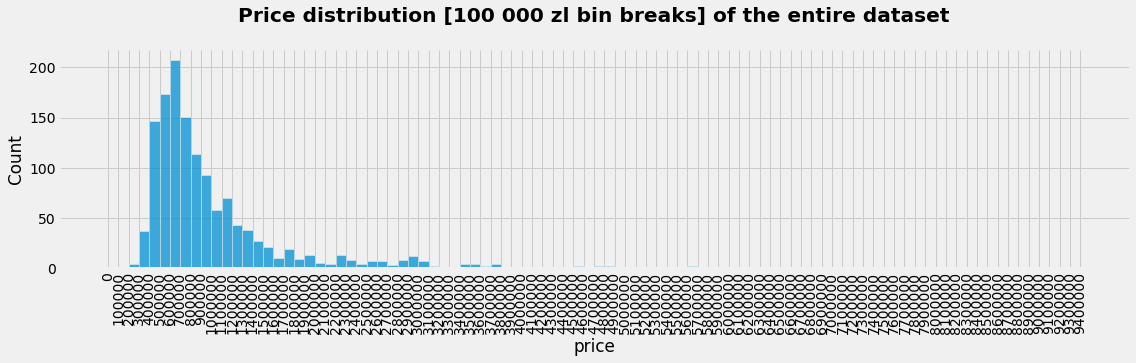

In [11]:
sns.displot(data, x="price", height=4, aspect=4, bins=list(range(0, int(max(data['price'])), 100000)))
plt.xticks(list(range(0, int(max(data['price'])), 100000)), rotation='vertical')
plt.title("Price distribution [100 000 zl bin breaks] of the entire dataset\n", fontweight='bold')
plt.savefig('GDYNIA_price_distribution.png', bbox_inches='tight')
plt.show()

**Cutting data** - left cut bins

In [12]:
r = range(0, int(max(data['price'])) + 100000, 100000)

data['LCBINS_100k'] = pd.cut(data['price'], r, right=False, labels=False)
def create_label(row):
    return str(row['LCBINS_100k'] * 100) + 'k - ' + str((row['LCBINS_100k'] + 1) * 100) +'k'

data['BINS_100k'] = data.apply(create_label, axis=1)
data.head(3)

,free_text,address,price,price_meter,rooms,area,more,add_link,rooms_umber,LCBINS_100k,BINS_100k
0,Nowy apartament Gdynia Orłowo - 2 pokoje,"Mieszkanie na sprzedaż: ul. Klonowa, Orłowo, G...",769000.0,17089,2 pokoje,45.00,Biuro nieruchomości,/pl/oferta/nowy-apartament-gdynia-orlowo-2-pok...,2,7,700k - 800k
1,Klimatyczna Nieruchomość Doskonała Pod Inwesty...,Mieszkanie na sprzedaż: Wzgórze Św. Maksymilia...,685000.0,11396,3 pokoje,60.11,Biuro nieruchomości,/pl/oferta/klimatyczna-nieruchomosc-doskonala-...,3,6,600k - 700k
2,Osiedle premium o wysokiej jakości! Blisko lasu!,"Mieszkanie na sprzedaż: Wiczlino, Gdynia, pomo...",995000.0,12369,3 pokoje,80.44,Biuro nieruchomości,/pl/oferta/osiedle-premium-o-wysokiej-jakosci-...,3,9,900k - 1000k


In [13]:

df = pd.pivot_table(data, 'price','LCBINS_100k', aggfunc=['count', 'min', 'max', 'median', 'mean']).astype(int)
df.sort_index(inplace=True)
df.style.bar(subset=["count"], color='#3ca7db')

,count,min,max,median,mean
,price,price,price,price,price
LCBINS_100k,,,,,
0,1,60000,60000,60000,60000
2,4,235880,275000,260500,257970
3,37,300000,399900,380000,371748
4,147,400000,499900,459000,460938
5,173,500000,599999,556000,557074
6,207,600000,699624,658000,657084
7,151,700000,799900,750000,755372
8,114,800000,899000,850890,857538


#### AREA

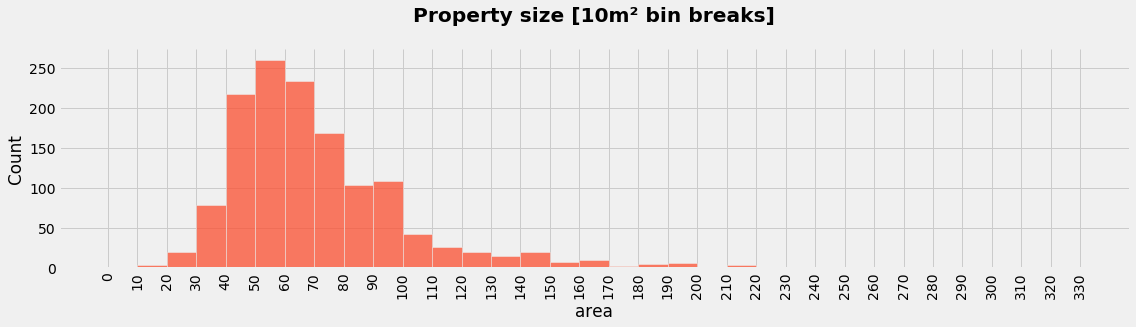

In [14]:
sns.displot(data, x="area", height=4, aspect=4, bins=list(range(0, int(max(data['area'])) + 10, 10)), color='#fc4f30' )
plt.xticks(list(range(0, int(max(data['area'])) + 10 , 10)), rotation='vertical')
plt.title("Property size [10m² bin breaks]\n", fontweight='bold')
plt.savefig('GDYNIA_size_distribution.png', bbox_inches='tight')
plt.show()

In [15]:
r = range(0, int(max(data['area'])) + 10, 10)

data['LCBINS_10'] = pd.cut(data['area'], r, right=False, labels=False)
def create_label(row):
    return str(row['LCBINS_10'] * 10) + ' - ' + str((row['LCBINS_10'] + 1) * 10) + 'm²'

data['BINS_10'] = data.apply(create_label, axis=1)
data.head(3)

,free_text,address,price,price_meter,rooms,area,more,add_link,rooms_umber,LCBINS_100k,BINS_100k,LCBINS_10,BINS_10
0,Nowy apartament Gdynia Orłowo - 2 pokoje,"Mieszkanie na sprzedaż: ul. Klonowa, Orłowo, G...",769000.0,17089,2 pokoje,45.00,Biuro nieruchomości,/pl/oferta/nowy-apartament-gdynia-orlowo-2-pok...,2,7,700k - 800k,4.0,40.0 - 50.0m²
1,Klimatyczna Nieruchomość Doskonała Pod Inwesty...,Mieszkanie na sprzedaż: Wzgórze Św. Maksymilia...,685000.0,11396,3 pokoje,60.11,Biuro nieruchomości,/pl/oferta/klimatyczna-nieruchomosc-doskonala-...,3,6,600k - 700k,6.0,60.0 - 70.0m²
2,Osiedle premium o wysokiej jakości! Blisko lasu!,"Mieszkanie na sprzedaż: Wiczlino, Gdynia, pomo...",995000.0,12369,3 pokoje,80.44,Biuro nieruchomości,/pl/oferta/osiedle-premium-o-wysokiej-jakosci-...,3,9,900k - 1000k,8.0,80.0 - 90.0m²


In [16]:
# create dictionary
values = data[['LCBINS_10', 'BINS_10']]
values = values.drop_duplicates(subset=['LCBINS_10'], keep='first').sort_values(by=['LCBINS_10'], ascending=True) 
d = pd.Series(values['BINS_10'].values,index=values['LCBINS_10']).to_dict()

df = pd.pivot_table(data, 'area','LCBINS_10', aggfunc=['count', 'min', 'max', 'median', 'mean']).astype(int)
df.sort_index(inplace=True)

df.index = [ d[k] for k in list(df.index)]
df.style.bar(subset=["count"], color='#fc4f30')

,count,min,max,median,mean
,area,area,area,area,area
10.0 - 20.0m²,3,15,18,16,16
20.0 - 30.0m²,20,20,29,25,25
30.0 - 40.0m²,78,30,39,36,35
40.0 - 50.0m²,217,40,49,45,45
50.0 - 60.0m²,260,50,59,55,54
60.0 - 70.0m²,234,60,69,63,63
70.0 - 80.0m²,168,70,79,74,74
80.0 - 90.0m²,104,80,89,83,84
90.0 - 100.0m²,108,90,99,94,94


### Price per square metre

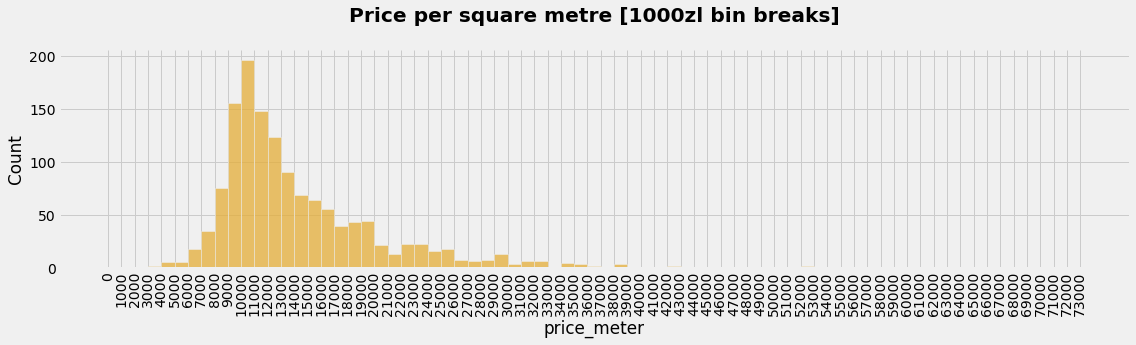

In [17]:
sns.displot(data, x="price_meter", height=4, aspect=4, bins=list(range(0, int(max(data['price_meter'])) + 1000, 1000)), color='#e5ae38' )
plt.xticks(list(range(0, int(max(data['price_meter'])) + 1000 , 1000)), rotation='vertical')
plt.title("Price per square metre [1000zl bin breaks]\n", fontweight='bold')
plt.savefig('GDYNIA_price_meter_distribution.png', bbox_inches='tight')
plt.show()

In [18]:
r = range(0, int(max(data['price_meter'])) + 1000, 1000)

data['LCBINS_1000SQ'] = pd.cut(data['price_meter'], r, right=False, labels=False)
def create_label(row):
    return str(row['LCBINS_1000SQ'] * 1000) + ' - ' + str((row['LCBINS_1000SQ'] + 1) * 1000) + ' zl/m²'

data['BINS_10SQ'] = data.apply(create_label, axis=1)
data.head(3)

,free_text,address,price,price_meter,rooms,area,more,add_link,rooms_umber,LCBINS_100k,BINS_100k,LCBINS_10,BINS_10,LCBINS_1000SQ,BINS_10SQ
0,Nowy apartament Gdynia Orłowo - 2 pokoje,"Mieszkanie na sprzedaż: ul. Klonowa, Orłowo, G...",769000.0,17089,2 pokoje,45.00,Biuro nieruchomości,/pl/oferta/nowy-apartament-gdynia-orlowo-2-pok...,2,7,700k - 800k,4.0,40.0 - 50.0m²,17,17000 - 18000 zl/m²
1,Klimatyczna Nieruchomość Doskonała Pod Inwesty...,Mieszkanie na sprzedaż: Wzgórze Św. Maksymilia...,685000.0,11396,3 pokoje,60.11,Biuro nieruchomości,/pl/oferta/klimatyczna-nieruchomosc-doskonala-...,3,6,600k - 700k,6.0,60.0 - 70.0m²,11,11000 - 12000 zl/m²
2,Osiedle premium o wysokiej jakości! Blisko lasu!,"Mieszkanie na sprzedaż: Wiczlino, Gdynia, pomo...",995000.0,12369,3 pokoje,80.44,Biuro nieruchomości,/pl/oferta/osiedle-premium-o-wysokiej-jakosci-...,3,9,900k - 1000k,8.0,80.0 - 90.0m²,12,12000 - 13000 zl/m²


In [19]:
# create dictionary
values = data[['LCBINS_1000SQ', 'BINS_10SQ']]
values = values.drop_duplicates(subset=['LCBINS_1000SQ'], keep='first').sort_values(by=['LCBINS_1000SQ'], ascending=True) 
d = pd.Series(values['BINS_10SQ'].values,index=values['LCBINS_1000SQ']).to_dict()

df = pd.pivot_table(data, 'price_meter','LCBINS_1000SQ', aggfunc=['count', 'min', 'max', 'median', 'mean']).astype(int)
df.sort_index(inplace=True)

df.index = [ d[k] for k in list(df.index)]
df.style.bar(subset=["count"], color='#e5ae38')

,count,min,max,median,mean
,price_meter,price_meter,price_meter,price_meter,price_meter
3000 - 4000 zl/m²,2,3333,3416,3374,3374
4000 - 5000 zl/m²,5,4000,4940,4200,4388
5000 - 6000 zl/m²,5,5275,5987,5469,5598
6000 - 7000 zl/m²,18,6100,6988,6823,6733
7000 - 8000 zl/m²,35,7000,7996,7535,7528
8000 - 9000 zl/m²,75,8000,8997,8487,8538
9000 - 10000 zl/m²,155,9028,9987,9586,9566
10000 - 11000 zl/m²,196,10000,10997,10503,10532
11000 - 12000 zl/m²,148,11000,11990,11478,11495


### ROOMS number

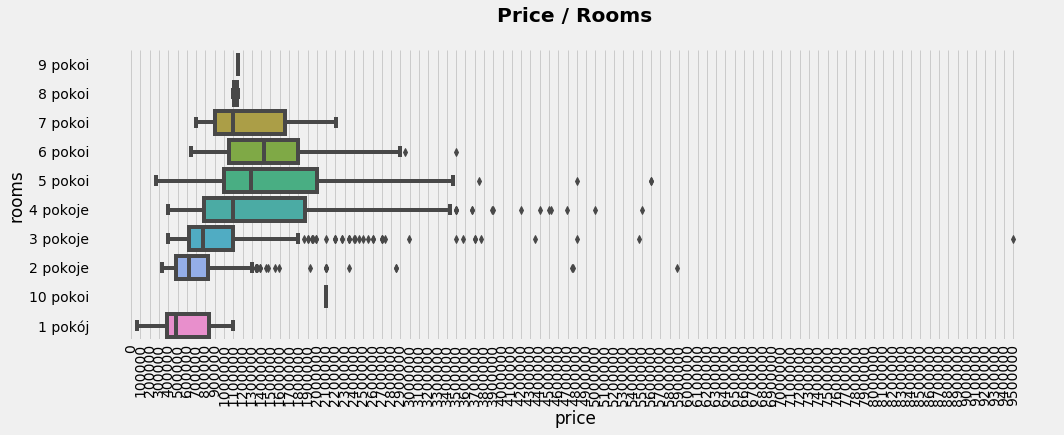

In [20]:
data = data.sort_values(by=['rooms'], ascending=False)  
sns.catplot(data=data, x="price", y="rooms", kind="box", height=5, aspect=3)
plt.xticks(list(range(0, int(max(data['price'])) + 100000, 100000)), rotation='vertical')
plt.title('Price / Rooms\n', fontweight='bold')
plt.savefig('GDYNIA_rooms_price.png', bbox_inches='tight')
plt.show()

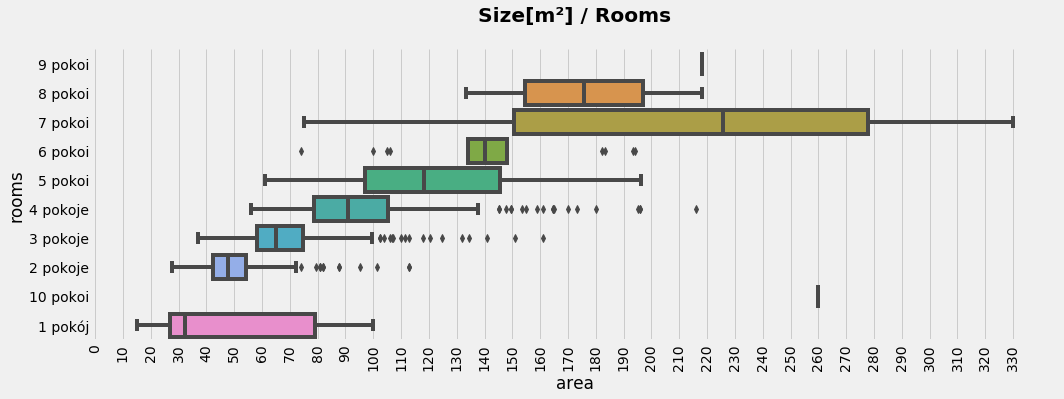

In [21]:
data = data.sort_values(by=['rooms'], ascending=False)  
sns.catplot(data=data, x="area", y="rooms", kind="box", height=5, aspect=3)
plt.xticks(list(range(0, int(max(data['area'])) + 10 , 10)), rotation='vertical')
plt.title('Size[m²] / Rooms\n', fontweight='bold')
plt.savefig('GDYNIA_rooms_size.png', bbox_inches='tight')
plt.show()

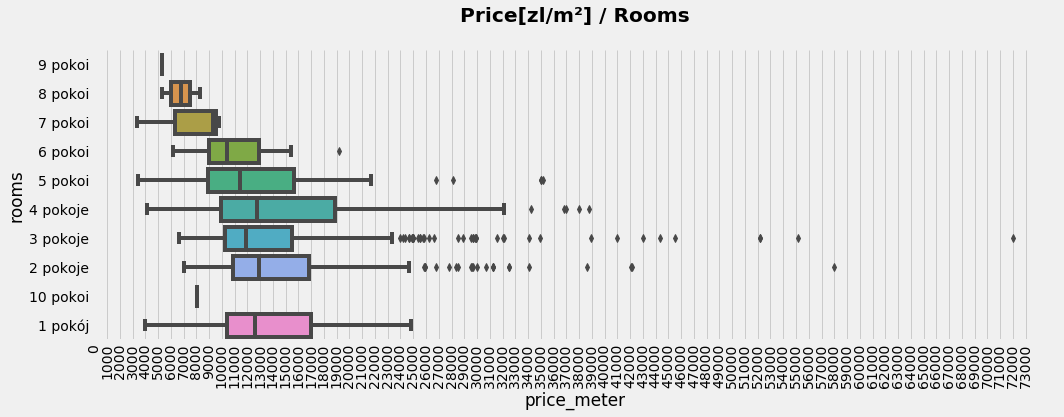

In [22]:
data = data.sort_values(by=['rooms'], ascending=False)  
sns.catplot(data=data, x="price_meter", y="rooms", kind="box", height=5, aspect=3)
plt.xticks(list(range(0, int(max(data['price_meter'])) + 1000 , 1000)), rotation='vertical')
plt.title('Price[zl/m²] / Rooms\n', fontweight='bold')
plt.savefig('GDYNIA_rooms_price_meter.png', bbox_inches='tight')
plt.show()

In [23]:
data.columns

Index(['free_text', 'address', 'price', 'price_meter', 'rooms', 'area', 'more',
       'add_link', 'rooms_umber', 'LCBINS_100k', 'BINS_100k', 'LCBINS_10',
       'BINS_10', 'LCBINS_1000SQ', 'BINS_10SQ'],
      dtype='object')